In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, lambdify, pprint, Matrix, simplify,solve, Poly, pdsolve
from sympy.solvers.ode.systems import dsolve_system
import scipy as sp
import time
import random
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
from tabulate import tabulate

In [2]:
a,b,c,d,x,y,p,q = symbols('a,b,c,d,x,y,p,q')
eq1 = Eq(x+y,1)
eq2 = Eq(x*p+y*q,1/2)
eq3 = Eq(x*p**2+y*q**2,1/3)
eq4 = Eq(x*(a*p+b*q)+y*(c*p+d*q),1/6)
eq5 = Eq(x*p**3+y*q**3,1/4)
eq6 = Eq(x*(a*p**2+b*q**2)+y*(c*p**2+d*q**2),1/12)
eq7 = Eq(x*p*(a*p+b*q)+y*q*(c*p+d*q),1/8)
eq8 = Eq(x*(a**2*p+a*b*q+b*c*p+c*d*q)+y*(c*a*p+c*b*q+d*c*p+d**2*q),1/24)
result1 = solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8],(a,b,c,d,x,y,p,q))

In [3]:
print(tabulate(result1))

---------  ---------  ----------  --------  ---  ---  --------  --------
-0.683013   0.211325   1.47169    0         0.5  0.5  0.211325  0.788675
 0.183013   0.788675   0.0283122  0         0.5  0.5  0.788675  0.211325
 0.461325  -0.25      -0.25       1.03868   0.5  0.5  0.788675  0.211325
 1.03868   -0.25      -0.25       0.461325  0.5  0.5  0.211325  0.788675
---------  ---------  ----------  --------  ---  ---  --------  --------


In [6]:
j,k,l,x,h,a,b,c,d= symbols('j,k,l,x,h,a,b,c,d')
eq1 = Eq(l*(x+h*(a*j+b*k))-j,0)
eq2 = Eq(l*(x+h*(c*j+d*k))-k,0)
result2 = solve([eq1,eq2],(j,k))

In [7]:
eq9 = Eq(r-(1+((x*(b-d)+y*(c-a))*h**2+h*(x+y))/((a*d-b*c)*h**2-(a+d)*h+1)),0)
result4 = solve([eq9],h)

In [8]:
h_1, h_2 = result4[0][0], result4[1][0]

In [9]:
h1 = lambdify((a,b,c,d,x,y,p,q,r), h_1,'numpy')
h2 = lambdify((a,b,c,d,x,y,p,q,r), h_2,'numpy')

In [10]:
a,b,c,d,x,y,p,q = [float(i) for i in result1[1]]

In [11]:
h_1 = h1(a,b,c,d,x,y,p,q,np.exp(np.linspace(0,2*np.pi,10000)*1j))
h_2 = h2(a,b,c,d,x,y,p,q,np.exp(np.linspace(0,2*np.pi,10000)*1j))

In [12]:
result5 = solve([eq9],r)

In [13]:
result5[r]

(a*d*h**2 - a*h**2*y - a*h - b*c*h**2 + b*h**2*x + c*h**2*y - d*h**2*x - d*h + h*x + h*y + 1)/(a*d*h**2 - a*h - b*c*h**2 - d*h + 1)

In [14]:
a,b,c,d,x,y,p,q = symbols('a,b,c,d,x,y,p,q')
r_fun = lambdify((a,b,c,d,x,y,p,q,h), result5[r],'numpy')

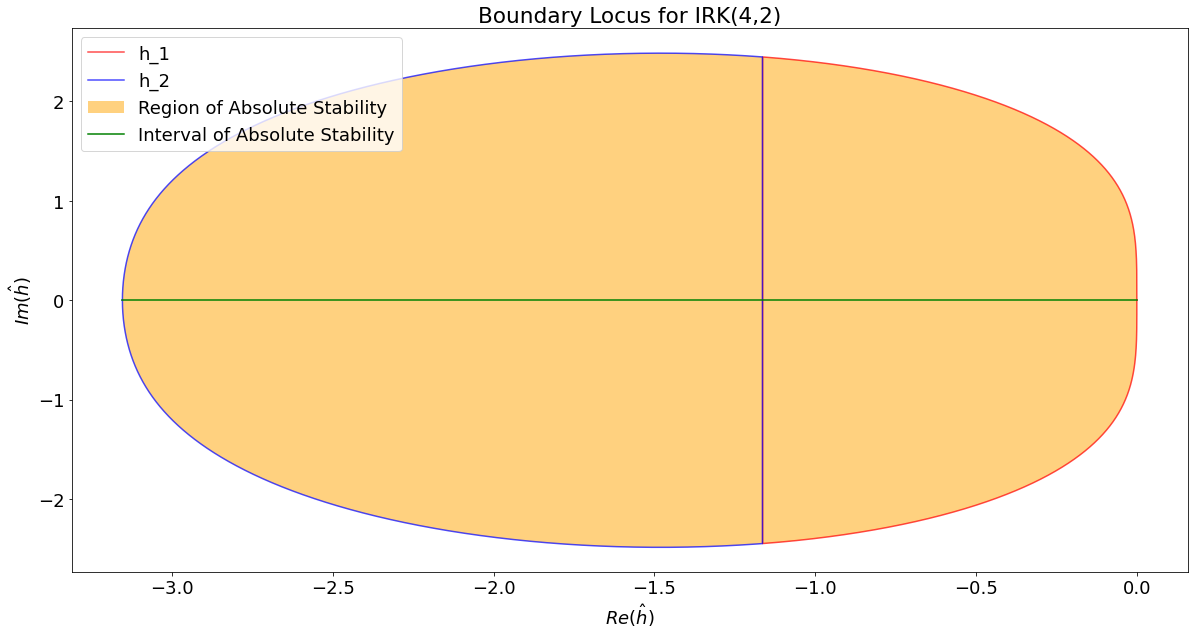

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(h_1.real,h_1.imag,label='h_1',alpha=0.7,c='r')
ax.plot(h_2.real,h_2.imag,label='h_2',alpha=0.7,c='b')
ax.set_xlabel("$Re(\hat{h})$")
ax.set_ylabel("$Im(\hat{h})$")
ax.set_title("Boundary Locus for IRK(4,2)")
ax.fill_between(h_1.real, h_1.imag, facecolor='orange', interpolate=True,alpha=0.5,label="Region of Absolute Stability")
ax.fill_between(h_2.real, h_2.imag, facecolor='orange', interpolate=True,alpha=0.5)
ax.plot([-3.155,0],[0,0],label='Interval of Absolute Stability',c='g')
plt.legend(loc='upper left')
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_4_plot1.png')
plt.show()

In [16]:
#vals to try -4, -2, -1, 1
a,b,c,d,x,y,p,q = [float(i) for i in result1[1]]
for h in (-4, -2, -1, 1):
    print((h,r_fun(a,b,c,d,x,y,p,q,h)))

(-4, 1.779610339095894)
(-2, 0.4266110727250414)
(-1, 0.4115427318801043)
(1, 2.6573003339025902)


In [18]:
a,b,c,d,x,y,p,q

(0.18301270189221933,
 0.7886751345948129,
 0.028312163512967795,
 0.0,
 0.5,
 0.5,
 0.7886751345948129,
 0.2113248654051871)

In [58]:
h = 1.0e-5 
dx = 1.0e-5
delta = 1.0e-5
L = 10
t = np.arange(0,1,h)
x = np.arange(0,L,dx)
u = np.empty((len(x),len(t)))
M = np.zeros(((len(x)-2),len(x)))
for i in range(M.shape[0]):
    for j in range(M.shape[1]-2):
               M[i,j] = 0.1/(dx)**2 + 1/(2*dx)
               M[i,j+1] = -2*0.1/dx**2
               M[i,j+2] = -1/(2*dx) + 0.1/dx**2

a,b,c,d,b_1,b_2,p,q = [float(i) for i in result1[1]]
#initalise for t0
u[:,0]=np.cos(2*np.pi*x/L)
for j in range(1,u.shape[1]):
    u_jminus1 = u[:,j-1]
    w_i = M @ u_jminus1
    w = lambda p: np.interp(p,x[1:-1],w_i)
    #init f.p
    k_1_old, k_2_old = np.ones(x.shape),np.ones(x.shape)
    for iteration in range(10000):
        k_1_new = w(x+h*(a*k_1_old+b*k_2_old))
        k_2_new = w(x+h*(c*k_1_old+d*k_2_old))
        if np.linalg.norm(k_1_old-k_1_new)/np.linalg.norm(k_1_new) < delta and np.linalg.norm(k_2_old-k_2_new)/np.linalg.norm(k_2_new) < delta:
            break
        k_1_old, k_2_old = k_1_new, k_2_new

    u[:,j] = u_jminus1 + h*(b_1*k_1_new+b_2*k_2_new)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in matmul
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in subtract


(100, 100)


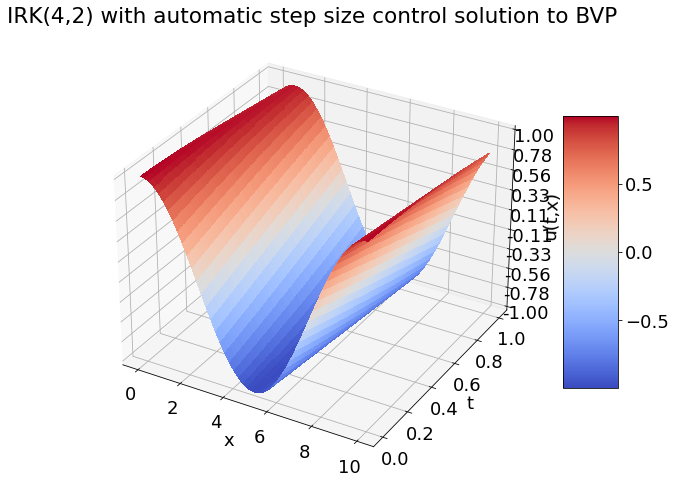

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=((10,10)))

x, t = np.meshgrid(x, t)
# Plot the surface.
surf = ax.plot_surface(t, x, u.T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(t,x)')
ax.set_title("IRK(4,2) with automatic step size control solution to BVP")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_4_plot2.png')
plt.show()

In [2]:
def jacobian(h,u):
    M = len(u) - 1
    l = len(u)
    A = lambda i: -0.5*u[i-1]
    B = lambda i: 1/h + 0.5*(2*u[i]+4*u[i-1]-u[i-2])
    C = lambda i: -3/h - u[(i+1)%M]+u[i-1]
    D = lambda i: 1/h + 0.5*(u[(i+2)%M]+4*u[(i+1)%M]-2*u[i])
    E = lambda i: 0.5*u[(i+1)%M]
    a = A(np.arange(l))
    b = B(np.arange(l))
    c = C(np.arange(l))
    d = D(np.arange(l))
    e = E(np.arange(l))
    out = np.diag(d.flatten())+np.diag(e[:-1].flatten(),k=1)+np.diag(c[1:].flatten(),k=-1)+np.diag(b[2:].flatten(),k=-2)+np.diag(a[3:].flatten(),k=-3)
    out[-1,0] = e[-1]
    out[0,-3] = a[0]
    out[0,-2] = b[0]
    out[0,-1] = c[0]
    out[1,-2] = a[1]
    out[1,-1] = b[1]
    out[2,-1] = a[2]
    return out

In [3]:
def f(h,a,b):
    M = len(a) - 1
    return np.array([((a[(i+1)%M]-3*a[i]+a[i-1])- (b[(i+1)%M]-3*b[i]+b[i-1]))/h + 0.5*(a[(i+1)%M]*(a[(i+2)%M]-2*a[(i+1)%M]-2*a[i])+a[i-1]*(2*a[i]+2*a[i-1]-a[i-2])) for i in range(len(a))])

In [4]:
h = 1.0e-2 
dx = 1.0e-2
eps = 1.0e-2
L = 10
t = np.arange(0,10,h)
x = np.arange(0,L,dx)
u = np.empty((len(x),len(t)))
#initalise for t0
u[:,0]=0.1*np.exp(-5*(x-L/3)**2)-0.1*np.exp(-5*(x-2*L/3)**2)
for j in range(1,u.shape[1]):
    #init newton
    u_j_old = u[:,j-1]
    u_jminus1 = 1.0*u[:,j-1]
    for k in range(10000):
        u_j_new = u_j_old - np.linalg.solve(jacobian(h,u_j_old),f(h,u_j_old,u_jminus1))
        if np.linalg.norm(u_j_new-u_j_old) / np.linalg.norm(u_j_new) < eps:
            break
        u_j_old = u_j_new
    u[:,j] = u_j_new

        
        

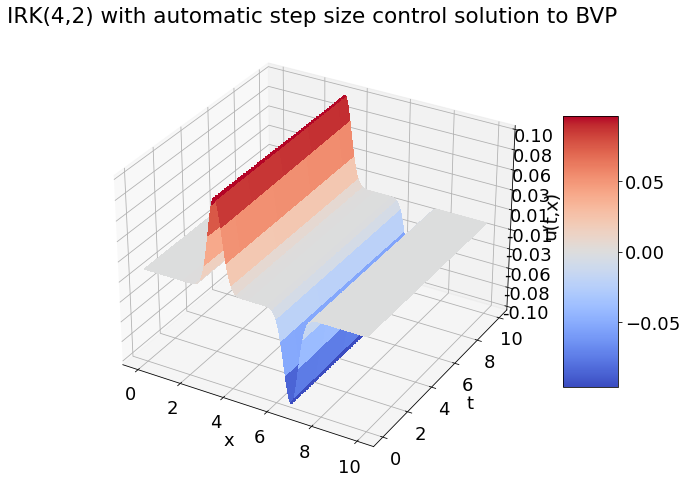

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=((10,10)))

# Make data.

x, t = np.meshgrid(x, t)
# Plot the surface.
surf = ax.plot_surface(t, x, u, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(t,x)')
ax.set_title("Backward Euler Solution to Camassa-Holm")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_4_plot3.png')
plt.show()